In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [28]:
df = pd.read_csv("/kaggle/input/new-laundering/HI-Small_Trans.csv")
df.head(10)

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.34,US Dollar,3697.34,US Dollar,Reinvestment,0
1,2022/09/01 00:20,3208,8000F4580,1,8000F5340,0.01,US Dollar,0.01,US Dollar,Cheque,0
2,2022/09/01 00:00,3209,8000F4670,3209,8000F4670,14675.57,US Dollar,14675.57,US Dollar,Reinvestment,0
3,2022/09/01 00:02,12,8000F5030,12,8000F5030,2806.97,US Dollar,2806.97,US Dollar,Reinvestment,0
4,2022/09/01 00:06,10,8000F5200,10,8000F5200,36682.97,US Dollar,36682.97,US Dollar,Reinvestment,0
5,2022/09/01 00:03,1,8000F5AD0,1,8000F5AD0,6162.44,US Dollar,6162.44,US Dollar,Reinvestment,0
6,2022/09/01 00:08,1,8000EBAC0,1,8000EBAC0,14.26,US Dollar,14.26,US Dollar,Reinvestment,0
7,2022/09/01 00:16,1,8000EC1E0,1,8000EC1E0,11.86,US Dollar,11.86,US Dollar,Reinvestment,0
8,2022/09/01 00:26,12,8000EC280,2439,8017BF800,7.66,US Dollar,7.66,US Dollar,Credit Card,0
9,2022/09/01 00:21,1,8000EDEC0,211050,80AEF5310,383.71,US Dollar,383.71,US Dollar,Credit Card,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5078345 entries, 0 to 5078344
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Timestamp           object 
 1   From Bank           int64  
 2   Account             object 
 3   To Bank             int64  
 4   Account.1           object 
 5   Amount Received     float64
 6   Receiving Currency  object 
 7   Amount Paid         float64
 8   Payment Currency    object 
 9   Payment Format      object 
 10  Is Laundering       int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 426.2+ MB


In [30]:
df.isna().sum()

Timestamp             0
From Bank             0
Account               0
To Bank               0
Account.1             0
Amount Received       0
Receiving Currency    0
Amount Paid           0
Payment Currency      0
Payment Format        0
Is Laundering         0
dtype: int64

In [31]:
object_cols = df.select_dtypes('object').columns.drop('Timestamp')
df[object_cols] = df[object_cols].astype('string')

In [32]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5078345 entries, 0 to 5078344
Data columns (total 11 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Timestamp           datetime64[ns]
 1   From Bank           int64         
 2   Account             string        
 3   To Bank             int64         
 4   Account.1           string        
 5   Amount Received     float64       
 6   Receiving Currency  string        
 7   Amount Paid         float64       
 8   Payment Currency    string        
 9   Payment Format      string        
 10  Is Laundering       int64         
dtypes: datetime64[ns](1), float64(2), int64(3), string(5)
memory usage: 426.2 MB


In [34]:
df.duplicated().sum()

9

In [35]:
df.drop_duplicates()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022-09-01 00:20:00,10,8000EBD30,10,8000EBD30,3697.340000,US Dollar,3697.340000,US Dollar,Reinvestment,0
1,2022-09-01 00:20:00,3208,8000F4580,1,8000F5340,0.010000,US Dollar,0.010000,US Dollar,Cheque,0
2,2022-09-01 00:00:00,3209,8000F4670,3209,8000F4670,14675.570000,US Dollar,14675.570000,US Dollar,Reinvestment,0
3,2022-09-01 00:02:00,12,8000F5030,12,8000F5030,2806.970000,US Dollar,2806.970000,US Dollar,Reinvestment,0
4,2022-09-01 00:06:00,10,8000F5200,10,8000F5200,36682.970000,US Dollar,36682.970000,US Dollar,Reinvestment,0
...,...,...,...,...,...,...,...,...,...,...,...
5078340,2022-09-10 23:57:00,54219,8148A6631,256398,8148A8711,0.154978,Bitcoin,0.154978,Bitcoin,Bitcoin,0
5078341,2022-09-10 23:35:00,15,8148A8671,256398,8148A8711,0.108128,Bitcoin,0.108128,Bitcoin,Bitcoin,0
5078342,2022-09-10 23:52:00,154365,8148A6771,256398,8148A8711,0.004988,Bitcoin,0.004988,Bitcoin,Bitcoin,0
5078343,2022-09-10 23:46:00,256398,8148A6311,256398,8148A8711,0.038417,Bitcoin,0.038417,Bitcoin,Bitcoin,0


In [36]:
df['Is Laundering'].value_counts()

Is Laundering
0    5073168
1       5177
Name: count, dtype: int64

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_columns = df.select_dtypes(include=['string']).columns
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])
df.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022-09-01 00:20:00,10,942,10,900,3697.34,12,3697.34,12,5,0
1,2022-09-01 00:20:00,3208,990,1,949,0.01,12,0.01,12,3,0
2,2022-09-01 00:00:00,3209,991,3209,940,14675.57,12,14675.57,12,5,0
3,2022-09-01 00:02:00,12,997,12,945,2806.97,12,2806.97,12,5,0
4,2022-09-01 00:06:00,10,999,10,947,36682.97,12,36682.97,12,5,0


In [38]:
X = df.drop(['Is Laundering','Timestamp'],axis=1)
y = df['Is Laundering']

In [15]:
import sklearn
print(sklearn.__version__)

1.4.2


In [ ]:
!pip install imblearn

In [ ]:
pip install --upgrade scikit-learn==1.4.2

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    average_precision_score,
    precision_recall_curve,
    auc,
    precision_score,
    f1_score,
    recall_score
)
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

In [40]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    stratify=y,
    random_state=42
)

pipe = Pipeline([('rus', RandomUnderSampler(sampling_strategy=0.2,random_state=42)),
                ('smote',SMOTE(sampling_strategy=0.5, k_neighbors=5, random_state=42))])
X_train_res, y_train_res = pipe.fit_resample(X_train, y_train)

print("Resampled training size:", X_train_res.shape)
print("Test set size (unchanged):", X_test.shape)

Resampled training size: (31065, 9)
Test set size (unchanged): (1015669, 9)


In [41]:
X_test_res, y_test_res = pipe.fit_resample(X_test, y_test)
print("Resampled Test set size:", X_test_res.shape)

Resampled Test set size: (7762, 9)


In [42]:
print("Resampled test set size:", y_test_res.shape)

Resampled test set size: (7762,)


In [43]:
count = 0
for x in y_test_res:
    if x==1:
        count+=1
print(count)

2587


In [44]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('clf',    LogisticRegression(max_iter=10000, random_state=42))
])

param_grid_lr = {
    'clf__C':          [0.01, 0.1, 1, 10, 100],
    'clf__penalty':    ['l1', 'l2', 'elasticnet'],
    'clf__solver':     ['saga'],
    'clf__l1_ratio':   [0.0, 0.5, 1.0],
    'clf__class_weight':[None, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_lr = GridSearchCV(
    pipeline_lr,
    param_grid=param_grid_lr,
    scoring='f1',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

grid_lr.fit(X_train_res, y_train_res)

print("Best params:", grid_lr.best_params_)
print("Best CV F1: ", grid_lr.best_score_)


Fitting 5 folds for each of 90 candidates, totalling 450 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=   1.1s
[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=   1.2s
[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=   1.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=   2.7s
[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=   3.7s
[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=   3.4s
[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=   3.0s
[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=   2.5s
[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=   3.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=   2.3s
[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=   1.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=   2.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=   1.6s
[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=   1.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=   1.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=   2.3s
[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=   2.7s
[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=   3.1s
[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=   1.1s
[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=   1.5s
[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=   2.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=   1.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=   1.0s
[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=   1.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=   1.2s
[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=   1.1s
[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=   1.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=   2.6s
[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=   2.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=   2.7s
[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=   3.2s
[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=   1.1s
[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=   1.2s
[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=   2.3s
[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=   1.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=   1.0s
[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=   1.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=   1.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=   1.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=   1.1s
[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=   2.6s
[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=   3.1s
[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=   3.4s
[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=   2.4s
[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=   2.8s
[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=   3.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=   2.4s
[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=   1.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=   1.4s
[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=   2.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=   1.0s
[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=   1.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=   3.0s
[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=   2.5s
[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=   3.4s
[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=   1.1s
[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=   1.1s
[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=   1.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=   2.7s
[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=   0.9s
[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=   1.5s
[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=   2.8s
[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=   2.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=   3.0s
[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=   3.4s
[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=   1.1s
[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=   1.1s
[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=   1.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=   1.0s
[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=   2.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.01, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=   7.7s
[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=   7.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=   8.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=   9.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=   6.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=   7.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=   6.4s
[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=   7.4s
[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=   5.7s
[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=   5.4s
[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=   6.1s
[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=   7.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=   5.7s
[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=   6.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=   6.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=   8.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=   9.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=   7.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=  10.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=   7.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=   5.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=   6.3s
[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=   7.3s
[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=   5.7s
[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=   5.3s
[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=   7.6s
[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=   9.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=   8.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=   7.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=   7.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=   8.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=   8.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=  10.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=   7.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=   5.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=   7.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=   7.2s
[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=   6.1s
[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=   5.5s
[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=   5.3s
[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=   7.8s
[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=   9.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=   7.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=   8.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=   7.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=  11.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=  12.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=  14.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=  11.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=  10.4s
[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=   7.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=  10.1s
[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=   8.5s
[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=   7.4s
[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=   7.9s
[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=   8.0s
[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=  10.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=   7.9s
[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=   8.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=   7.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=  12.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=  12.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=  14.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=  11.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=   8.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=  10.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=   8.7s
[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=  10.5s
[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=   8.2s
[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=   7.6s
[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=  10.8s
[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=  13.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=  11.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=  12.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=  10.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=  11.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=  12.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=  14.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=  11.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=  10.7s
[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=   8.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=   8.4s
[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=  10.2s
[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=   7.4s
[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=   7.9s
[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=  12.0s
[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=  15.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=  11.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=  13.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=0.1, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=  10.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=   8.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=   9.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=  11.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=   8.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=   8.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=   6.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=   8.5s
[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=   7.8s
[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=   7.0s
[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=   7.0s
[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=   7.6s
[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=   7.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=   6.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=   8.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=   6.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=   8.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=   9.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=   8.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=  11.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=   8.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=   6.8s
[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=   7.4s
[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=   8.5s
[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=   6.2s
[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=   6.5s
[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=   9.0s
[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=  11.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=   9.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=  10.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=   8.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=   8.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=   9.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=  11.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=   8.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=   7.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=   6.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=   7.3s
[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=   8.6s
[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=   6.5s
[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=   6.6s
[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=   9.5s
[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=  11.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=  10.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=   8.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=   7.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=  12.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=  13.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=  15.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=  12.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=   9.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=  11.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=  13.0s
[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=  11.3s
[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=  10.2s
[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=  10.1s
[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=   9.8s
[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=  12.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=  10.4s
[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=  10.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=   9.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=  12.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=  13.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=  16.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=  13.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=  12.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=  10.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=  10.3s
[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=  12.4s
[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=   9.9s
[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=   9.3s
[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=  12.5s
[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=  16.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=  13.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=  13.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=  12.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=  13.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=  13.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=  15.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=  12.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=  11.6s
[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=   9.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=  12.5s
[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=  10.5s
[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=  10.4s
[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=  11.3s
[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=  13.1s
[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=  16.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=  13.3s
[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=  12.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=1, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=  11.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=   8.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=   9.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=  11.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=   8.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=   8.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=   7.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=   9.5s
[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=   8.4s
[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=   7.3s
[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=   7.1s
[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=   7.1s
[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=   7.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=   8.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=   6.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=   6.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=   8.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=   9.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=  11.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=   8.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=   8.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=   6.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=   9.4s
[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=   9.0s
[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=   7.1s
[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=   7.3s
[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=   8.9s
[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=   8.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=  11.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=   9.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=   8.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=   9.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=   9.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=  11.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=   8.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=   8.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=   7.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=   9.5s
[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=   8.1s
[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=   7.3s
[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=   6.8s
[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=   8.9s
[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=  10.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=   8.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=   9.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=   8.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=  12.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=  13.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=  16.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=  13.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=  11.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=  10.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=  10.7s
[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=  13.3s
[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=  10.3s
[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=   9.5s
[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=  10.5s
[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=  12.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=  10.7s
[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=  10.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=   9.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=  13.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=  13.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=  16.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=  13.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=  12.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=  10.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=  10.9s
[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=  12.8s
[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=   9.3s
[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=  10.1s
[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=  13.7s
[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=  17.0s
[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=  13.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=  14.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=  12.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=  13.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=  13.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=  16.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=  13.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=  10.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=  12.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=  13.5s
[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=  11.6s
[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=   9.5s
[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=  10.3s
[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=  12.7s
[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=  13.3s
[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=  12.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=  16.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=10, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=  12.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=   9.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=  12.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=  10.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=   9.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=   8.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=   7.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=   8.9s
[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=   7.9s
[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=   6.7s
[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=   7.1s
[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=   7.3s
[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=   9.1s
[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=   8.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=   7.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=   7.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=   9.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=  10.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=  12.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=   9.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=   6.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=   8.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=   8.7s
[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=   8.0s
[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=   6.7s
[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=   6.9s
[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=   9.0s
[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=  11.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=   8.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=  10.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=   8.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=   9.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=  12.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=  11.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=   9.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=   9.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=   7.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=   9.0s
[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=   8.2s
[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=   7.0s
[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=   6.9s
[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=   8.9s
[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=  11.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=   8.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=  10.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=None, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=   9.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=  13.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=  14.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=  17.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=  13.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l1, clf__solver=saga; total time=  12.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=  10.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=  10.9s
[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=  13.0s
[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=   9.8s
[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=l2, clf__solver=saga; total time=  10.6s
[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=  11.2s
[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=  14.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=  11.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=  11.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=0.0, clf__penalty=elasticnet, clf__solver=saga; total time=   9.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=  12.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=  13.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=  16.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=  13.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l1, clf__solver=saga; total time=  12.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=  10.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=  10.8s
[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=  13.6s
[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=  10.5s
[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=l2, clf__solver=saga; total time=   9.4s
[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=  13.0s
[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=  16.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=  13.2s
[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=  13.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=0.5, clf__penalty=elasticnet, clf__solver=saga; total time=  12.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=  13.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=  14.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=  16.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=  13.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=   9.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l1, clf__solver=saga; total time=  12.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=  12.5s
[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=  10.7s
[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=  10.2s
[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=l2, clf__solver=saga; total time=   9.8s
[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=  13.1s
[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=  16.7s
[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=  13.5s
[CV] END clf__C=100, clf__class_weight=balanced, clf__l1_ratio=1.0, clf__penalty=elasticnet, clf__solver=saga; total time=

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Best params: {'clf__C': 100, 'clf__class_weight': None, 'clf__l1_ratio': 0.0, 'clf__penalty': 'l1', 'clf__solver': 'saga'}
Best CV F1:  0.8269429959126156


In [45]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report

pipeline_best_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('clf',    LogisticRegression(
        C=100,
        penalty='l1',
        solver='saga',
        l1_ratio=0.0,
        class_weight=None,
        max_iter=10000,
        random_state=42
    ))
])

pipeline_best_lr.fit(X_train_res, y_train_res)

y_proba_test = pipeline_best_lr.predict_proba(X_test_res)[:, 1]
y_pred_test  = pipeline_best_lr.predict(X_test_res)

roc_auc = roc_auc_score(y_test_res, y_proba_test)
print(f"Test ROC-AUC: {roc_auc:.4f}\n")

print("Classification Report:")
print(classification_report(y_test_res, y_pred_test, zero_division=0))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Test ROC-AUC: 0.9137

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      5175
           1       0.79      0.88      0.83      2587

    accuracy                           0.88      7762
   macro avg       0.86      0.88      0.87      7762
weighted avg       0.89      0.88      0.88      7762



In [46]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

pipeline_xgb = Pipeline([
    ('clf', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        n_jobs=-1
    ))
])

param_grid_xgb = {
    'clf__n_estimators':    [100, 200, 300],
    'clf__max_depth':       [3, 6, 10],
    'clf__learning_rate':   [0.01, 0.1, 0.2],
    'clf__subsample':       [0.6, 0.8, 1.0],
    'clf__colsample_bytree':[0.6, 0.8, 1.0],
    'clf__gamma':           [0, 1, 5]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_xgb = GridSearchCV(
    pipeline_xgb,
    param_grid=param_grid_xgb,
    scoring='f1',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

grid_xgb.fit(X_train_res, y_train_res)

print("Best params:", grid_xgb.best_params_)
print("Best CV F1: ", grid_xgb.best_score_)


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
[CV] END clf__colsample_bytree=0.6, clf__gamma=0, clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, clf__subsample=0.6; total time=   0.4s
[CV] END clf__colsample_bytree=0.6, clf__gamma=0, clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, clf__subsample=0.6; total time=   0.4s
[CV] END clf__colsample_bytree=0.6, clf__gamma=0, clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, clf__subsample=0.6; total time=   0.4s
[CV] END clf__colsample_bytree=0.6, clf__gamma=0, clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, clf__subsample=0.6; total time=   0.4s
[CV] END clf__colsample_bytree=0.6, clf__gamma=0, clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, clf__subsample=0.8; total time=   0.4s
[CV] END clf__colsample_bytree=0.6, clf__gamma=0, clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, clf__subsample=0.6; total time=   0.4s
[CV] E

In [47]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report

pipeline_best_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('clf',    XGBClassifier(
        colsample_bytree = 1.0,
        gamma = 0,
        learning_rate = 0.1,
        max_depth = 10,
        n_estimators = 300,
        subsample = 0.8
        ))
])

pipeline_best_xgb.fit(X_train_res, y_train_res)

y_proba_test = pipeline_best_xgb.predict_proba(X_test_res)[:, 1]
y_pred_test  = pipeline_best_xgb.predict(X_test_res)

roc_auc = roc_auc_score(y_test_res, y_proba_test)
print(f"Test ROC-AUC: {roc_auc:.4f}\n")

print("Classification Report:")
print(classification_report(y_test_res, y_pred_test, zero_division=0))

Test ROC-AUC: 0.9799

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      5175
           1       0.89      0.88      0.89      2587

    accuracy                           0.92      7762
   macro avg       0.92      0.91      0.91      7762
weighted avg       0.92      0.92      0.92      7762



In [48]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

pipeline_ada = Pipeline([
    ('clf', AdaBoostClassifier(random_state=42))
])

param_grid_ada = {
    'clf__n_estimators': [50, 100, 200],
    'clf__learning_rate': [0.01, 0.1, 1.0]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_ada = GridSearchCV(
    pipeline_ada,
    param_grid=param_grid_ada,
    scoring='precision',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

grid_ada.fit(X_train_res, y_train_res)

print("Best params:", grid_ada.best_params_)
print("Best CV precision: ", grid_ada.best_score_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ......clf__learning_rate=0.01, clf__n_estimators=50; total time=   2.3s
[CV] END ......clf__learning_rate=0.01, clf__n_estimators=50; total time=   2.3s
[CV] END ......clf__learning_rate=0.01, clf__n_estimators=50; total time=   2.3s
[CV] END ......clf__learning_rate=0.01, clf__n_estimators=50; total time=   2.3s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ......clf__learning_rate=0.01, clf__n_estimators=50; total time=   2.4s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .....clf__learning_rate=0.01, clf__n_estimators=100; total time=   4.7s
[CV] END .....clf__learning_rate=0.01, clf__n_estimators=100; total time=   4.8s
[CV] END .....clf__learning_rate=0.01, clf__n_estimators=100; total time=   4.8s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .....clf__learning_rate=0.01, clf__n_estimators=100; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .....clf__learning_rate=0.01, clf__n_estimators=100; total time=   5.0s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .....clf__learning_rate=0.01, clf__n_estimators=200; total time=  10.0s
[CV] END .....clf__learning_rate=0.01, clf__n_estimators=200; total time=  10.0s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .....clf__learning_rate=0.01, clf__n_estimators=200; total time=   9.5s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .......clf__learning_rate=0.1, clf__n_estimators=50; total time=   2.3s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .......clf__learning_rate=0.1, clf__n_estimators=50; total time=   2.3s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .....clf__learning_rate=0.01, clf__n_estimators=200; total time=   9.4s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .......clf__learning_rate=0.1, clf__n_estimators=50; total time=   2.3s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .......clf__learning_rate=0.1, clf__n_estimators=50; total time=   2.3s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .......clf__learning_rate=0.1, clf__n_estimators=50; total time=   2.4s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .....clf__learning_rate=0.01, clf__n_estimators=200; total time=   9.1s
[CV] END ......clf__learning_rate=0.1, clf__n_estimators=100; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ......clf__learning_rate=0.1, clf__n_estimators=100; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ......clf__learning_rate=0.1, clf__n_estimators=100; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ......clf__learning_rate=0.1, clf__n_estimators=100; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ......clf__learning_rate=0.1, clf__n_estimators=100; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ......clf__learning_rate=0.1, clf__n_estimators=200; total time=   9.2s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ......clf__learning_rate=0.1, clf__n_estimators=200; total time=   9.1s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ......clf__learning_rate=0.1, clf__n_estimators=200; total time=   9.2s
[CV] END .......clf__learning_rate=1.0, clf__n_estimators=50; total time=   2.3s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ......clf__learning_rate=0.1, clf__n_estimators=200; total time=   9.2s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .......clf__learning_rate=1.0, clf__n_estimators=50; total time=   2.3s
[CV] END .......clf__learning_rate=1.0, clf__n_estimators=50; total time=   2.3s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .......clf__learning_rate=1.0, clf__n_estimators=50; total time=   2.3s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .......clf__learning_rate=1.0, clf__n_estimators=50; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ......clf__learning_rate=1.0, clf__n_estimators=100; total time=   4.9s
[CV] END ......clf__learning_rate=0.1, clf__n_estimators=200; total time=  10.1s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ......clf__learning_rate=1.0, clf__n_estimators=100; total time=   5.5s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ......clf__learning_rate=1.0, clf__n_estimators=100; total time=   4.9s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ......clf__learning_rate=1.0, clf__n_estimators=100; total time=   4.6s
[CV] END ......clf__learning_rate=1.0, clf__n_estimators=100; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ......clf__learning_rate=1.0, clf__n_estimators=200; total time=   9.1s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ......clf__learning_rate=1.0, clf__n_estimators=200; total time=   9.2s
[CV] END ......clf__learning_rate=1.0, clf__n_estimators=200; total time=   9.2s
[CV] END ......clf__learning_rate=1.0, clf__n_estimators=200; total time=   9.2s
[CV] END ......clf__learning_rate=1.0, clf__n_estimators=200; total time=   7.0s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best params: {'clf__learning_rate': 1.0, 'clf__n_estimators': 200}
Best CV precision:  0.8158607133641824


In [49]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import AdaBoostClassifier

pipeline_ada_best = Pipeline([
    ('clf', AdaBoostClassifier(
        n_estimators=200,
        learning_rate=1.0,
        random_state=42
    ))
])

pipeline_ada_best.fit(X_train_res, y_train_res)

y_pred = pipeline_ada_best.predict(X_test_res)

y_proba_test = pipeline_ada_best.predict_proba(X_test_res)[:, 1]
y_pred_test  = pipeline_ada_best.predict(X_test_res)

roc_auc = roc_auc_score(y_test_res, y_proba_test)
print(f"Test ROC-AUC: {roc_auc:.4f}\n")

print("Classification Report:")
print(classification_report(y_test_res, y_pred_test, zero_division=0))

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test ROC-AUC: 0.9643

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      5175
           1       0.82      0.90      0.86      2587

    accuracy                           0.90      7762
   macro avg       0.88      0.90      0.89      7762
weighted avg       0.90      0.90      0.90      7762



/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


ROC-AUC on Test Set: 0.964258490520234

Classification Report (Threshold = 0.5):
               precision    recall  f1-score   support

           0       0.95      0.90      0.92      5175
           1       0.82      0.90      0.86      2587

    accuracy                           0.90      7762
   macro avg       0.88      0.90      0.89      7762
weighted avg       0.90      0.90      0.90      7762



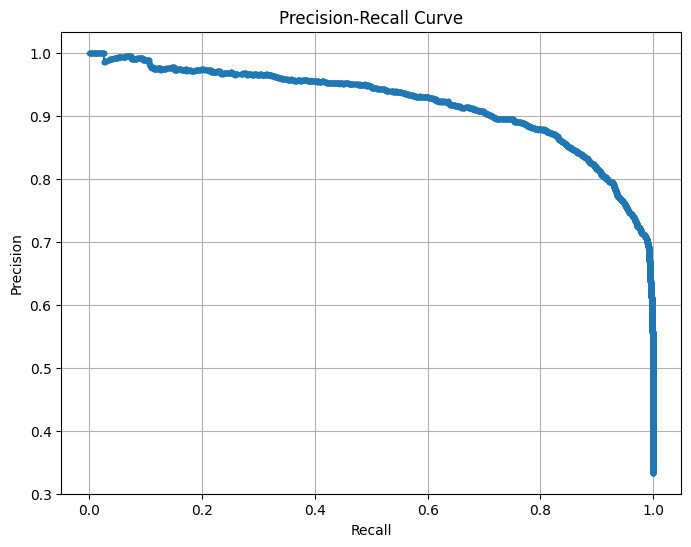


Classification Report (Threshold = 0.7):
               precision    recall  f1-score   support

           0       0.67      1.00      0.80      5175
           1       0.00      0.00      0.00      2587

    accuracy                           0.67      7762
   macro avg       0.33      0.50      0.40      7762
weighted avg       0.44      0.67      0.53      7762



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [50]:
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt

best_ada_model = grid_ada.best_estimator_
best_ada_model.fit(X_train_res, y_train_res)

y_probs = best_ada_model.predict_proba(X_test_res)[:, 1]

y_pred_default = (y_probs >= 0.5).astype(int)

print("ROC-AUC on Test Set:", roc_auc_score(y_test_res, y_probs))
print("\nClassification Report (Threshold = 0.5):\n", classification_report(y_test_res, y_pred_default))

precision, recall, thresholds = precision_recall_curve(y_test_res, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

custom_threshold = 0.7
y_pred_custom = (y_probs >= custom_threshold).astype(int)

print(f"\nClassification Report (Threshold = {custom_threshold}):\n", classification_report(y_test_res, y_pred_custom))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

num_cols     = X.select_dtypes(include=['int64','float64']).columns
scaler       = StandardScaler()
X_train_s    = scaler.fit_transform(X_train[num_cols])
X_val_s      = scaler.transform   (X_val[num_cols])
X_test_s     = scaler.transform   (X_test[num_cols])

def build_mlp(input_dim):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid'),
    ])
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=[tf.keras.metrics.AUC(name='auc')]
    )
    return model

mlp = build_mlp(X_train_s.shape[1])
es  = callbacks.EarlyStopping(
    monitor='val_auc', patience=5, mode='max', restore_best_weights=True
)

history = mlp.fit(
    X_train_s, y_train,
    validation_data=(X_val_s, y_val),
    epochs=50,
    batch_size=256,
    callbacks=[es],
    verbose=2
)

mlp_test_loss, mlp_test_auc = mlp.evaluate(X_test_s, y_test, verbose=0)
print(f"MLP Test AUC: {mlp_test_auc:.4f}")
